### 손실곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [2]:
# 모델 생성
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape= (28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    # 은닉층을 추가 한다.
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

- verbose : 훈련 과정 출력을 조절하는 매개변수(기본값 = 1)
- verbose = 1(기본값) : 에포크마다 진행 막대와 손실지표들이 출력된다.
- verbose = 2 : 진행막대가 빠진다.
- verbose = 0 : 훈련 과정을 나타내지 않는다

In [5]:
history.history.keys() # history는 history라는 딕셔너리 객체가 생김

dict_keys(['loss', 'accuracy'])

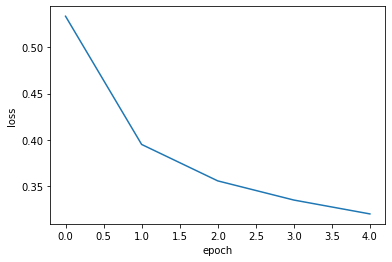

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

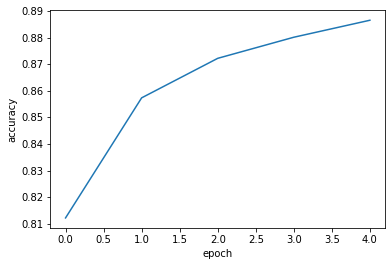

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
# 에포크의 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프를 그려보세요.
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])
history2 = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

In [9]:
history2.history.keys()

dict_keys(['loss', 'accuracy'])

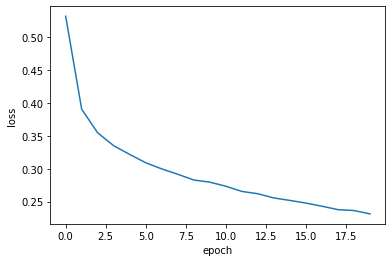

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history2.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

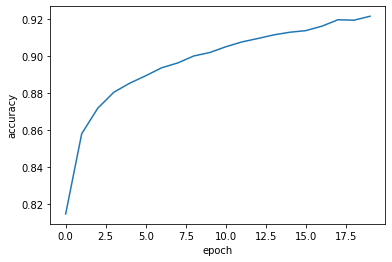

In [11]:
plt.plot(history2.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [12]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
                    validation_data = (val_scaled, val_target))
# validation_data : 검증

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

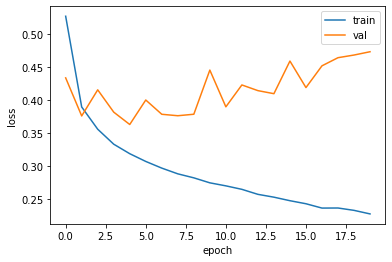

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 훈련데이터는 꾸준히 감소하지만 검증데이터는 다시 상승하는 부분을을 보이는 것은 전형적인 과대적합 모델이 만들어 진것을 말한다.

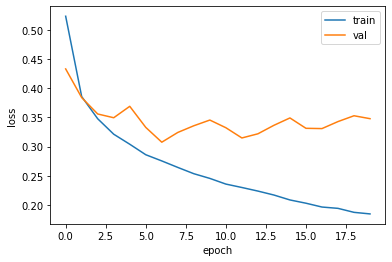

In [15]:
# adam - 과대적합을 막기위한 최적화 알고리즘으로 많이 씀
model = model_fn()
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
# 과대적합 막는방법
# 특정 은닉창을 drop 시킨다.

### 드롭아웃(Dropout)
- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.
        ( 0으로 끈다 )        

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


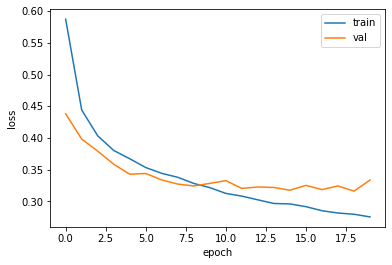

In [18]:
# epoch 올리면 손실은 줄일수 있지만 과대적합도 상승
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [20]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, 
                    validation_data = (val_scaled, val_target))

In [21]:
# 모델 저장과 복원
# 훈련된 모델의 파라미터를 저장
model.save_weights('model-weight.h5') # HDF5 - 확장자

In [22]:
# 모델 구조와 모델 파라미터 저장
model.save('model-whole.h5')

In [24]:
import numpy as np
val_labels_ = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels_ == val_target))

0.8810833333333333


In [25]:
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3328953679005305, 0.8810833]

In [27]:
model1 = keras.models.load_model('model-whole.h5')
model1.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3328953679005305, 0.8810833]